# Session 4: Intro to Time Series

In this session we will learn how to use the [`pandas.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) object to represent time series data as well as using the `pandas` specific functions to manipulate and analyze time series data.

* What is a time series?
* How to create a time series
* Resampling, shifting, and windowing

## What is a time series?

A time series is a sequence of values that are recorded at regular intervals. This values can represent the time series of a particular variable, such as the number of people in a particular location, or the temperature of a particular location.

It's important to mention that a timeseries is not a container of values, but rather a map between the values and time at which they were recorded.

We usually have more than one series in a time series data set. For example, we might have a series of the number of people in a particular location, and another series of the temperature of a particular location. Or stock price and volume of a particular company. Or energy production and consumption of a particular country. Always with the same timestamp.

Let's create a time series!

## How to create a time series

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

# start and end of timeseries
start = datetime.datetime(2020, 1, 1)
end = pd.to_datetime("today")

idx = pd.date_range(start, end)

idx[0]

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html#pandas.date_range

Timestamp('2020-01-01 00:00:00', freq='D')

In [2]:
# we can also create our dates by using other parameters from pandas.date_range

pd.date_range(start, periods=50, freq="H")

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               '2020-01-01 10:00:00', '2020-01-01 11:00:00',
               '2020-01-01 12:00:00', '2020-01-01 13:00:00',
               '2020-01-01 14:00:00', '2020-01-01 15:00:00',
               '2020-01-01 16:00:00', '2020-01-01 17:00:00',
               '2020-01-01 18:00:00', '2020-01-01 19:00:00',
               '2020-01-01 20:00:00', '2020-01-01 21:00:00',
               '2020-01-01 22:00:00', '2020-01-01 23:00:00',
               '2020-01-02 00:00:00', '2020-01-02 01:00:00',
               '2020-01-02 02:00:00', '2020-01-02 03:00:00',
               '2020-01-02 04:00:00', '2020-01-02 05:00:00',
               '2020-01-02 06:00:00', '2020-01-02 07:00:00',
               '2020-01-

In [3]:
# we can now use the index to create out timeseries

ts = pd.Series(np.random.rand(len(idx),), index=idx)

ts

# https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html

2020-01-01    0.977175
2020-01-02    0.356075
2020-01-03    0.712287
2020-01-04    0.797214
2020-01-05    0.558593
                ...   
2022-12-11    0.758840
2022-12-12    0.949525
2022-12-13    0.051559
2022-12-14    0.040783
2022-12-15    0.839928
Freq: D, Length: 1080, dtype: float64

In [4]:
# we can use the index to slice our timeseries
ts["2020-06-04": "2022-01-06"]

2020-06-04    0.731579
2020-06-05    0.952002
2020-06-06    0.335352
2020-06-07    0.586884
2020-06-08    0.943722
                ...   
2022-01-02    0.345824
2022-01-03    0.305166
2022-01-04    0.960068
2022-01-05    0.975356
2022-01-06    0.508331
Freq: D, Length: 582, dtype: float64

In [5]:
# we can also slice only on specific years
ts["2021"]

2021-01-01    0.275106
2021-01-02    0.519946
2021-01-03    0.796404
2021-01-04    0.121893
2021-01-05    0.725502
                ...   
2021-12-27    0.222694
2021-12-28    0.789798
2021-12-29    0.997198
2021-12-30    0.097049
2021-12-31    0.585153
Freq: D, Length: 365, dtype: float64

Let's practice with other frequencies to understand their effect in our timeseries

| Code | Description  |
|------|--------------|	
| D	   | Calendar day |	
| W	   | Weekly       |	
| M	   | Month end    |	
| Q	   | Quarter end  |	
| A	   | Year end     |	
| H	   | Hours        |	
| T	   | Minutes      |	
| S	   | Seconds      |	
| L	   | Milliseconds |	
| U	   | Microseconds |	
| N	   | nanoseconds  |	

In [6]:
def random_timeseries_creator(start, periods, freq):
    """
    This function creates a random timeseries with the given parameters.
    
    : param start: start of the timeseries
    : param periods: number of periods in the timeseries
    : param freq: frequency of the timeseries
    : return: a timeseries with random values
    """
    idx = pd.date_range(start, periods=periods, freq=freq)
    ts = pd.Series(np.random.rand(len(idx,)), index=idx)
    return ts

def plot_timeseries(ts, ax=None):
    """
    This function plots a timeseries using pandas.
    
    : param ts: timeseries to plot
    """
    ts.plot()
    plt.show()
    
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

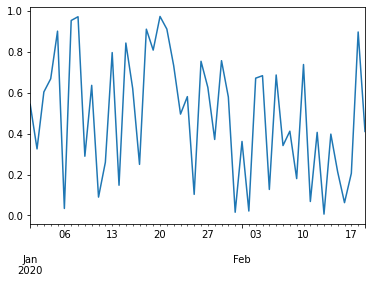

In [7]:
start = "2020-01-01"
ts = random_timeseries_creator(start, periods=50, freq="D")
plot_timeseries(ts)

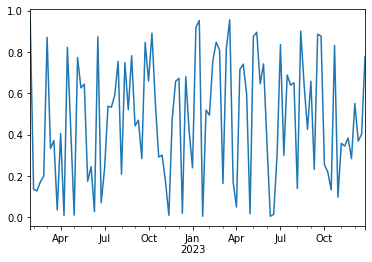

In [8]:
start = "2022-01-24"
ts = random_timeseries_creator(start, periods=100, freq="W")
plot_timeseries(ts)

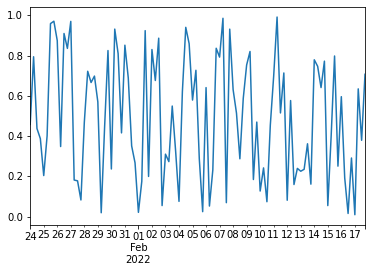

In [9]:
start = "2022-01-24"
ts = random_timeseries_creator(start, periods=100, freq="6H")
plot_timeseries(ts)

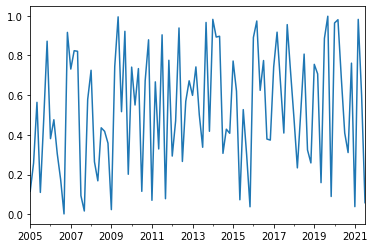

In [10]:
start = "2005-01-24"
ts = random_timeseries_creator(start, periods=100, freq="2M")
plot_timeseries(ts)

DatetimeIndex(['2022-01-24 21:30:00', '2022-01-25 00:00:00',
               '2022-01-25 02:30:00', '2022-01-25 05:00:00',
               '2022-01-25 07:30:00'],
              dtype='datetime64[ns]', freq='150T')


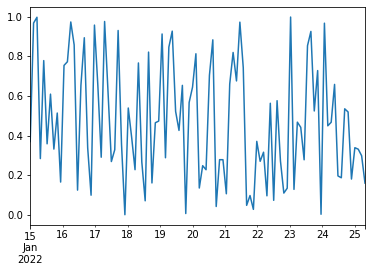

In [11]:
start = "2022-01-15"

ts = random_timeseries_creator(start, periods=100, freq="2H30T")

print(ts.index[-5:])

plot_timeseries(ts)

In [12]:
start = "2005-01-24"

ts1 = random_timeseries_creator(start, periods=5, freq="Q")
ts2 = random_timeseries_creator(start, periods=5, freq="QS")

print(ts1.index)
print(ts2.index)

DatetimeIndex(['2005-03-31', '2005-06-30', '2005-09-30', '2005-12-31',
               '2006-03-31'],
              dtype='datetime64[ns]', freq='Q-DEC')
DatetimeIndex(['2005-04-01', '2005-07-01', '2005-10-01', '2006-01-01',
               '2006-04-01'],
              dtype='datetime64[ns]', freq='QS-JAN')


In [40]:
# let's plot both timeseries in the same figure in different subplots

## Resampling, shifting and windowing

Now that we have learned ho to create timeseries, we can use the `pandas` specific functions to manipulate and analyze time series data.

These functions work the best when using an index that is a `pandas.DatetimeIndex`.

We are going to use the `yfinance` package to download the data for some stocks!

In [14]:
 !pip install yfinance

  Using cached yfinance-0.1.90-py2.py3-none-any.whl (29 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Attempting uninstall: lxml
    Found existing installation: lxml 4.8.0
    Uninstalling lxml-4.8.0:
      Successfully uninstalled lxml-4.8.0


In [15]:
import yfinance as yf

nflx_stock = yf.download(
    "SAB.MC", 
    start="2021-01-01", 
    end="2022-11-28",
    interval="60m", 
    progress=False
)

nflx_stock.sort_index(inplace=True)

nflx_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-01-04 09:00:00,0.3584,0.3599,0.3433,0.3502,0.3502,0
2021-01-04 10:00:00,0.3505,0.3549,0.3503,0.3517,0.3517,5028849
2021-01-04 11:00:00,0.3513,0.3529,0.3512,0.3518,0.3518,5724272
2021-01-04 12:00:00,0.3518,0.3574,0.3517,0.3568,0.3568,2374591
2021-01-04 13:00:00,0.3566,0.3600,0.3563,0.3588,0.3588,3793431


### Resample

When in need of chaning the frequency of the data, we can use the `resample` function: [docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html)

This function will resample the data to a new frequency, specified by us as a parameter, and return a new `pandas.Series` object containing an aggregated value for each new period, according to the aggregation function: sum, mean, min, max, etc

If we just want to take samples of the data with a different frequency, we can use `asfreq`: [docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.asfreq.html)


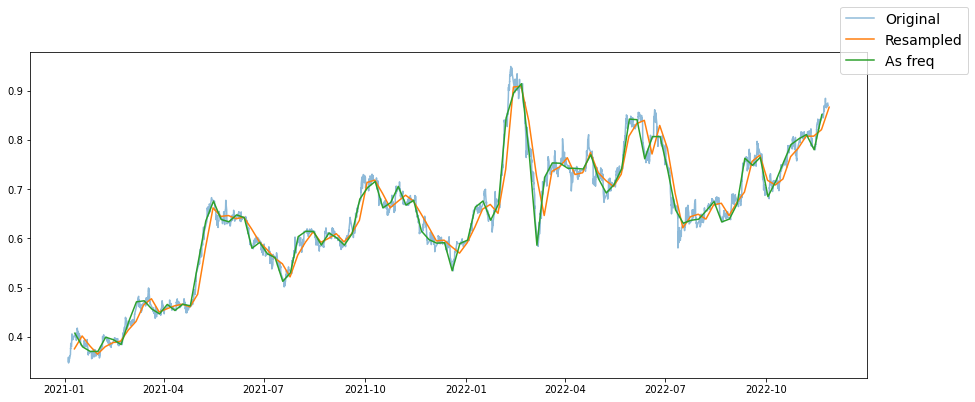

In [16]:
nflx_close = nflx_stock["Close"]

nflx_close_resample = nflx_close.resample("W").mean()  # resample to weekly average
nflx_close_asfreq = nflx_close.asfreq("W", method="bfill") # as weekly value

fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(nflx_close.index, nflx_close, label="Original", alpha=0.5)
ax.plot(nflx_close_resample.index, nflx_close_resample, label="Resampled")
ax.plot(nflx_close_asfreq.index, nflx_close_asfreq, label="As freq")

fig.legend(fontsize=14)

### Shifting

We've learned how to resample the data, but we can also shift our timeseries:
* `pd.Series.shift` will "push" the data forward or backward in time

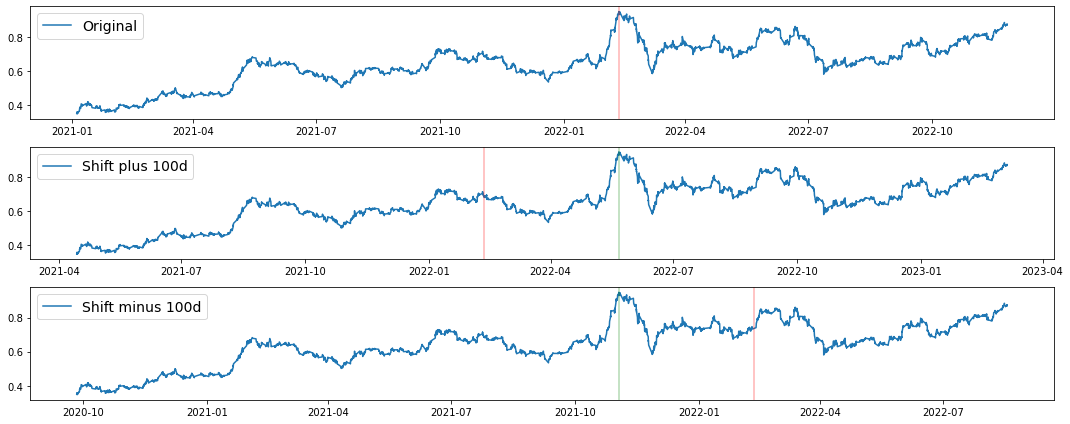

In [17]:
# get the max value and its index
max_nflx = nflx_close.max()
max_nflx_index = nflx_close.idxmax()

# create some shifts
nflx_close_shift_p100 = nflx_close.shift(100, freq="D")
max_nflx_pshift_index = nflx_close_shift_p100.idxmax()

nflx_close_shift_m100 = nflx_close.shift(-100, freq="D")
max_nflx_mshift_index = nflx_close_shift_m100.idxmax()

# plot stuffffff

fig, ax = plt.subplots(3, sharey=True, figsize=(15, 6))

ax[0].plot(nflx_close.index, nflx_close, label="Original")
ax[0].legend(fontsize=14)
ax[0].axvline(max_nflx_index, alpha=0.3, color='red')

ax[1].plot(nflx_close_shift_p100.index, nflx_close_shift_p100, label="Shift plus 100d")
ax[1].legend(fontsize=14)
ax[1].axvline(max_nflx_index, alpha=0.3, color='red')
ax[1].axvline(max_nflx_pshift_index, alpha=0.3, color='green')

ax[2].plot(nflx_close_shift_m100.index, nflx_close_shift_m100, label="Shift minus 100d")
ax[2].legend(fontsize=14)
ax[2].axvline(max_nflx_index, alpha=0.3, color='red')
ax[2].axvline(max_nflx_mshift_index, alpha=0.3, color='green')

fig.tight_layout()

With `shift` we can calculate the return of the stock price over a period of time: if we assume we buy the stock at the beginning of the period, and sell it at the end of the period, we can calculate the return of the stock.

### Rolling windows

With the rolling mean, we can achieve similar results as with `resample` but with a fixed period between each sample --the period in the original data.

## Homework

1. Choose a company and compete with your colleagues in finding which was the stock with the highest return in the last year (2022) Plot it.

2. What happened with NFLX price in 2022? It looks like in January, April there were big bumps in the price...

3. Set a trading strategy and see how good can it be:
    * Buy at open and sell at close
    * Buy at close and sell at open


<AxesSubplot:xlabel='Date'>

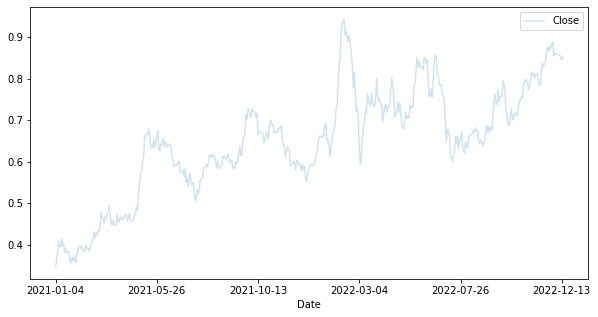

In [20]:
import pandas as pd
import numpy as np

df = pd.read_csv("SAB.MC.csv")

df.head()
import matplotlib.pyplot as plt

df.plot(x="Date", y="Close", kind="line", figsize=(10, 5), alpha=0.2)


Highest closing value =  0.9490000009536743
Lowest closing value =  0.3472000062465668


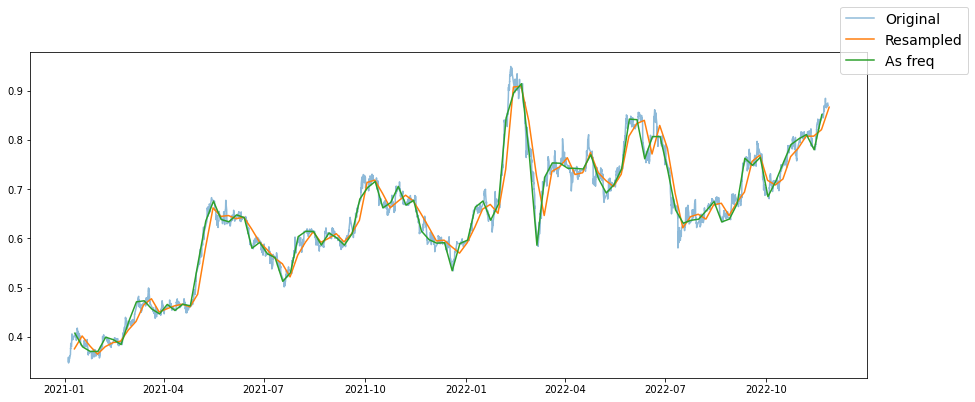

In [25]:
nflx_close = nflx_stock["Close"]

nflx_close_resample = nflx_close.resample("W").mean()  # resample to weekly average
nflx_close_asfreq = nflx_close.asfreq("W", method="bfill") # as weekly value

fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(nflx_close.index, nflx_close, label="Original", alpha=0.5)
ax.plot(nflx_close_resample.index, nflx_close_resample, label="Resampled")
ax.plot(nflx_close_asfreq.index, nflx_close_asfreq, label="As freq")

fig.legend(fontsize=14)

print("Highest closing value = ",max(nflx_stock["Close"]))
print("Lowest closing value = ",min(nflx_stock["Close"]))

In [26]:
import yfinance as yf

nflx_stock = yf.download(
    "NFLX", 
    start="2021-01-01", 
    end="2022-11-28",
    interval="60m", 
    progress=False
)

nflx_stock.sort_index(inplace=True)

nflx_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-01-04 09:30:00,540.799988,540.799988,527.630127,528.523499,528.523499,997379
2021-01-04 10:30:00,528.130005,528.786621,521.070007,522.750000,522.750000,715529
2021-01-04 11:30:00,522.590027,524.119995,515.340027,517.260010,517.260010,607387
2021-01-04 12:30:00,516.669983,519.789978,515.085022,519.162720,519.162720,400041
2021-01-04 13:30:00,519.150024,522.859985,518.500000,521.549988,521.549988,347095


We can see that NFLX crashed in 2022 jan and has not recovered yet


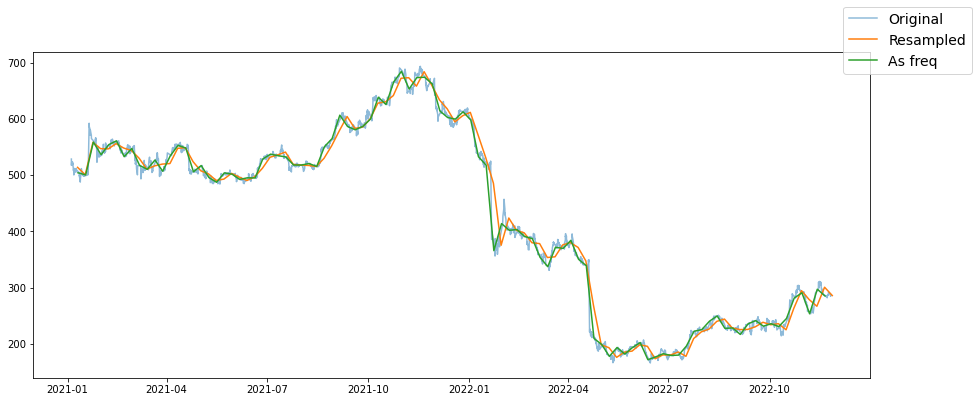

In [28]:
nflx_close = nflx_stock["Close"]

nflx_close_resample = nflx_close.resample("W").mean()  # resample to weekly average
nflx_close_asfreq = nflx_close.asfreq("W", method="bfill") # as weekly value

fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(nflx_close.index, nflx_close, label="Original", alpha=0.5)
ax.plot(nflx_close_resample.index, nflx_close_resample, label="Resampled")
ax.plot(nflx_close_asfreq.index, nflx_close_asfreq, label="As freq")

fig.legend(fontsize=14)

print("We can see that NFLX crashed in 2022 jan and has not recovered yet")

In [32]:
import yfinance as yf

nflx_stock = yf.download(
    "SAB.MC", 
    start="2021-01-01", 
    end="2022-11-28",
    interval="60m", 
    progress=False
)

nflx_stock.sort_index(inplace=True)

nflx_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2021-01-04 09:00:00,0.3584,0.3599,0.3433,0.3502,0.3502,0
2021-01-04 10:00:00,0.3505,0.3549,0.3503,0.3517,0.3517,5028849
2021-01-04 11:00:00,0.3513,0.3529,0.3512,0.3518,0.3518,5724272
2021-01-04 12:00:00,0.3518,0.3574,0.3517,0.3568,0.3568,2374591
2021-01-04 13:00:00,0.3566,0.3600,0.3563,0.3588,0.3588,3793431


In [34]:
nflx_stock.loc[:, 'G/L'] = np.where(nflx_stock.loc[:, 'Close'] > nflx_stock["Open"], 'Greater', 'Lower')


nflx_stock_n = nflx_stock.groupby(['G/L'])[["G/L"]].count()
print(nflx_stock_n)

print("here we can see the number of times Closing was greater than open but we also need to calculate by how much the difference is each time and judge based on that")




          G/L
G/L          
Greater  2167
Lower    2234
here we can see the number of times Closing was greater than open but we also need to calculate by how much the difference is each time and judge based on that
